In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('bank.csv')

In [75]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [77]:
df.replace(to_replace = 'yes', value = 1, inplace = True)
df.replace(to_replace = 'no', value = 0, inplace = True)
df['marital'].replace(to_replace = 'married',value = 1, inplace = True)
df['marital'].replace(to_replace = 'divorced',value = 2, inplace = True)
df['education'].replace(to_replace = 'secondary',value = 1, inplace = True)
df['education'].replace(to_replace = 'tertiary',value = 2, inplace = True)
df['marital'].replace(to_replace = 'single',value = 0, inplace = True)
df['education'].replace(to_replace = 'primary',value = 0, inplace = True)
df.replace(to_replace = 'unknown', value = 3, inplace = True)
df.replace(to_replace = 'failure', value = 4, inplace = True)

In [78]:
z = df[['age', 'marital', 'education', 'default','duration', 'balance', 'housing', 'loan']]
y = df['deposit']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [80]:
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=0.25,random_state=0)

In [81]:
lr = LogisticRegression()
lr.fit(z_train, y_train)

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

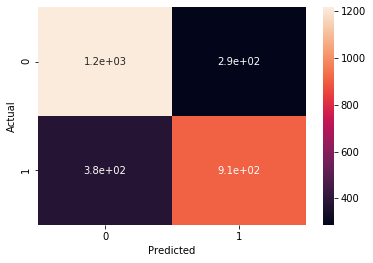

In [82]:
y_pred = lr.predict(z_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [83]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7613758509494805


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(z_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
knn.score(z_test, y_test)

0.6958079541383017

In [86]:
cust_new = df.drop(['job','day','month','duration','campaign','pdays','previous','poutcome'], axis = 1)
cust_new['age'] = (cust_new['age'] > 40.5).astype(float)
cust_new['balance'] = (cust_new['balance'] > 1000).astype(float)
cust_new.head(10)

,age,marital,education,default,balance,housing,loan,contact,deposit
0,1.0,1,1,0,1.0,1,0,3,1
1,1.0,1,1,0,0.0,0,0,3,1
2,1.0,1,1,0,1.0,1,0,3,1
3,1.0,1,1,0,1.0,1,0,3,1
4,1.0,1,2,0,0.0,0,0,3,1
5,1.0,0,2,0,0.0,1,1,3,1
6,1.0,1,2,0,0.0,1,1,3,1
7,1.0,2,1,0,0.0,1,0,3,1
8,0.0,1,1,0,0.0,1,0,3,1
9,0.0,0,1,0,1.0,1,0,3,1


In [16]:
cust_new.to_csv(r'C:\Users\HitBuy Atrium\Desktop\c1.csv')

In [87]:
def parse_file(name):
    df = pd.read_csv(name, sep=',')
    #df = df.replace(to_replace='positive', value=1)
    #df = df.replace(to_replace='negative', value=0)
    #the above two lines are for those who will use positive and negative in their target classes
    x = np.array(df['deposit'])
    del df['deposit']
    bin_df = dummy_encode_categorical_columns(df)
    return np.array(bin_df).astype(int), x

In [88]:
import copy
import numpy as np
def dummy_encode_categorical_columns(data):
    result_data = copy.deepcopy(data)
    for column in data.columns.values:
        result_data = pd.concat([result_data, pd.get_dummies(result_data[column], prefix = column, prefix_sep = ': ')], axis = 1)
        del result_data[column]
    return result_data
X_train, y_train = parse_file('tr1.csv')
X_test, y_test = parse_file('te1.csv')

X_train_pos = X_train[y_train == 1]
X_train_neg = X_train[y_train == 0]

In [89]:
y_pred = []
for test_obj in X_test:
    pos = np.sum(test_obj == X_train_pos) / float(len(X_train_pos))
    neg = np.sum(test_obj == X_train_neg) / float(len(X_train_neg))
    if (pos > neg):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [91]:
print("Accuracy: {}\n\
Precision: {}\n\
Recall: {}".format(acc, prec, rec))

Accuracy: 0.7929179740026894
Precision: 1.0
Recall: 0.7929179740026894
